In [1]:
# Используемые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

***Задание 1***
* ***Загрузите файл HR.csv в pandas dataframe***

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Заменим числовую интерпретацию данных у категорийных переменных, для упрощения дальнейшего анализа

df.loc[df['Work_accident'] == 0, 'Work_accident'] = 'No'
df.loc[df['Work_accident'] == 1, 'Work_accident'] = 'Yes'

df.loc[df['left'] == 0, 'left'] = 'No'
df.loc[df['left'] == 1, 'left'] = 'Yes'

df.loc[df['promotion_last_5years'] == 0, 'promotion_last_5years'] = 'No'
df.loc[df['promotion_last_5years'] == 1, 'promotion_last_5years'] = 'Yes'


In [4]:
# Посмотрим, какие данные содержит датасет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  object 
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  object 
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


In [5]:
# Проверим пропуски
for column in df:
    missings = df[column].isnull().mean()
    print(f'{column} - {missings :.1%}')

satisfaction_level - 0.0%
last_evaluation - 0.0%
number_project - 0.0%
average_montly_hours - 0.0%
time_spend_company - 0.0%
Work_accident - 0.0%
left - 0.0%
promotion_last_5years - 0.0%
department - 0.0%
salary - 0.0%


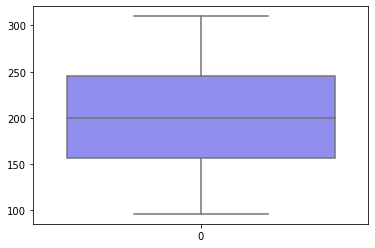

In [6]:
# Посмотрим на выбросы
sns.boxplot(data=df['average_montly_hours'], palette='cool')

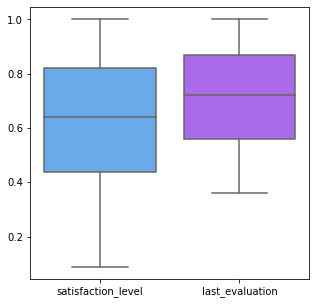

In [7]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df[['satisfaction_level', 'last_evaluation']], palette='cool')

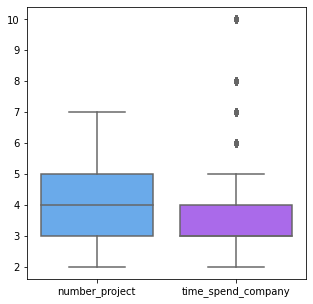

In [8]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df[['number_project', 'time_spend_company']], palette='cool') 

Обнаружены выбросы только в 'time_spend_company', но по смыслу подобные значения не противоречат нашим данным, поэтому убирать их нет необходимости.

***Задание 2***
* ***Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)***

In [58]:
# добавим моду в describe, уберем лишние строки категориальных данных

df_m = df.describe()

metrics = {}
for column in df_m:
    metrics[column] = df[column].mode()[0]
df_m = pd.concat([df_m, pd.DataFrame([metrics], index = ['mode'])])
df_m = df_m.drop(index=['count', '25%', '75%'])
df_m.rename(index={'50%':'median'}, inplace=True)
df_m

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
median,0.640000,0.720000,4.000000,200.000000,3.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000


Теперь все основные статистики для переменных можно получить из таблицы:

* Cреднее - mean
* Медиана - median
* Мода - mode
* Мин/макс - min/max
* Сред.отклонение - std

In [10]:
# По категориальным данным можно вывести моду

print(f'Мода по столбцу Work_accident: {df.Work_accident.mode()[0]}')
print(f'Мода по столбцу left: {df.left.mode()[0]}')
print(f'Мода по столбцу promotion_last_5years: {df.promotion_last_5years.mode()[0]}')
print(f'Мода по столбцу department: {df.department.mode()[0]}')
print(f'Мода по столбцу salary: {df.salary.mode()[0]}')

Мода по столбцу Work_accident: No
Мода по столбцу left: No
Мода по столбцу promotion_last_5years: No
Мода по столбцу department: sales
Мода по столбцу salary: low


***Задание 3*** 
* ***Рассчитать и визуализировать корреляционную матрицу для количественных переменных.***
* ***Определите две самые скоррелированные и две наименее скоррелированные переменные.***

In [11]:
# Используем метод Кенделла для определения корреляции, так как часть данных не являются непрерывными

corr_matrix = df.corr(method='kendall')
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842
number_project,0.022077,0.266267,1.000000,0.306987,0.195025
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000


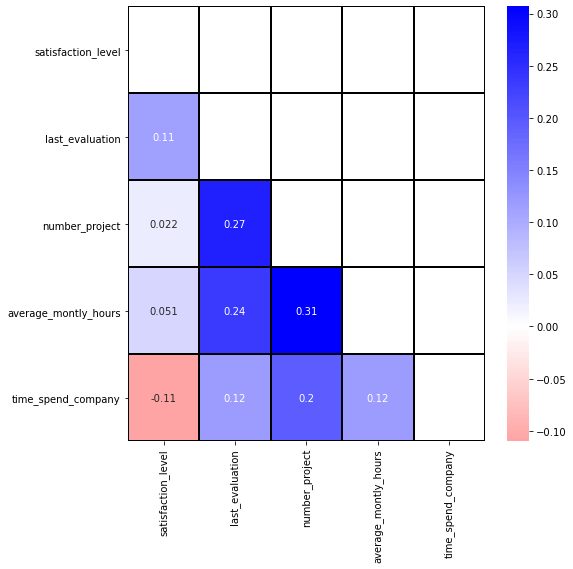

In [12]:
# Визуализируем, для наглядности оставим только ту часть матрицы, где встречаются не повторяющиеся пересечения переменных, 
# цветовую шкалу отцентруем относительно нуля, соответственно самая высокая корреляция отмечается наиболее насыщенным цветом
plt.figure(figsize=(8, 8))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='bwr_r', mask=mask, center=0, linewidths=1, linecolor='black')

* две самые скоррелированные переменные - number_project и average_montly_hours
* две наименее скоррелированные переменные - number_project и satisfaction_level

***Задание 4***
* ***Рассчитайте сколько сотрудников работает в каждом департаменте***

In [13]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

***Задание 5***
* ***Показать распределение сотрудников по зарплатам***

In [14]:
# Распределение в числовом формате
df_s = df.groupby('salary').count()[['satisfaction_level']].rename(columns={'satisfaction_level':'total'})
df_s

,total
salary,
high,1237
low,7316
medium,6446


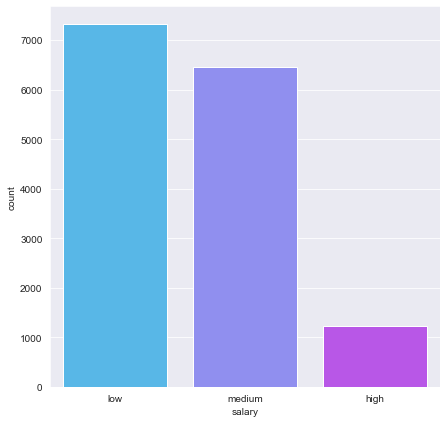

In [15]:
# распределение визуально
plt.figure(figsize=(7, 7))
sns.set_style('darkgrid')
sns.countplot(x='salary', data=df, palette='cool')

***Задание 6***
* ***Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности***

In [48]:
# Распределение в числовом формате
df_sal_dep = df.pivot_table(index = 'salary', 
                            columns = 'department', 
                            values = 'satisfaction_level', 
                            aggfunc = 'count', fill_value = 0)

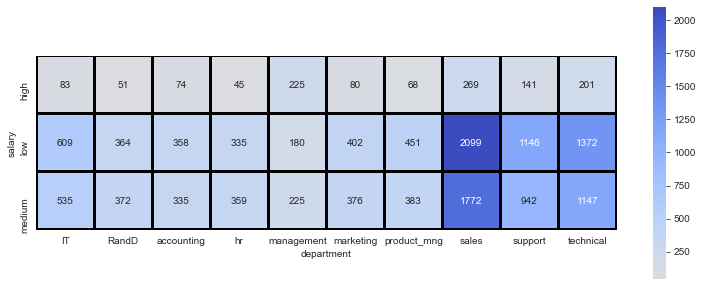

In [66]:
plt.figure(figsize=(13, 5))
sns.heatmap(data=df_sal_dep,
            annot=True,
            fmt='d',
            cmap='coolwarm_r',
            linecolor='black',
            center=0,
            linewidths=2,
           square=True)

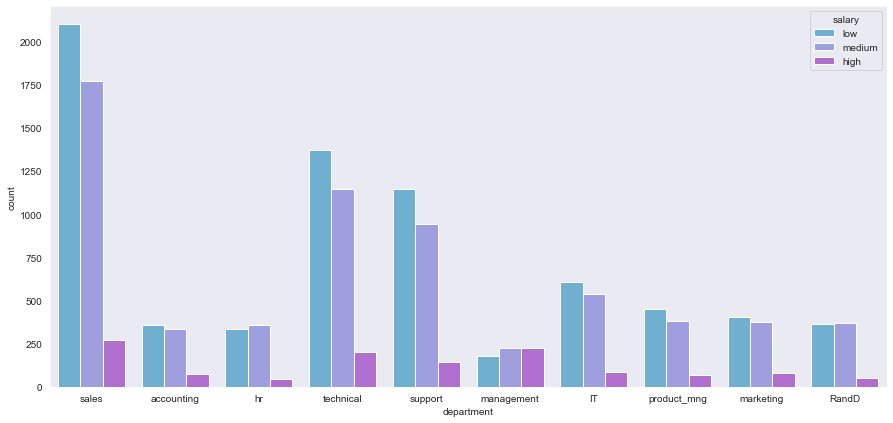

In [18]:
# распределение визуально
plt.figure(figsize=(15, 7))
sns.set_style('dark')
sns.countplot(data=df, x='department', hue='salary', palette='cool', saturation=0.5)

Sales - самый многочисленный отдел, здесь чаще всего встречаются самые низкие показатели зарплаты и чаще всего самые высокие (видимо зарплата сотрудников отдела зависит от выполнения индивидуального плана продаж)
Hr и RandD  - средние показатели встречаются немного чаще низких, высокие встречаются редко (стабильные средние оклады)
Management - средние и высокие показатели встречаются чаще, чем низкие (руководители в среднем чаще получают более высокую зарплату)
Остальные отделы показывают примерно одинаковую картину: наибольшая часть сотрудников получает низкую зарплату, чуть меньшее количество среднюю и малая часть - высокую

***Задание 7***
* ***Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом***

Сформулируем Н0 и Н1: 
* *H0*: среднее время, проведенное сотрудниками с высоким окладом не отличается от среднего времени у сотрудников с низким окладом
* *H1*: среднее время, проведенное сотрудниками с высоким окладом отличается от среднего времени у сотрудников с низким окладом

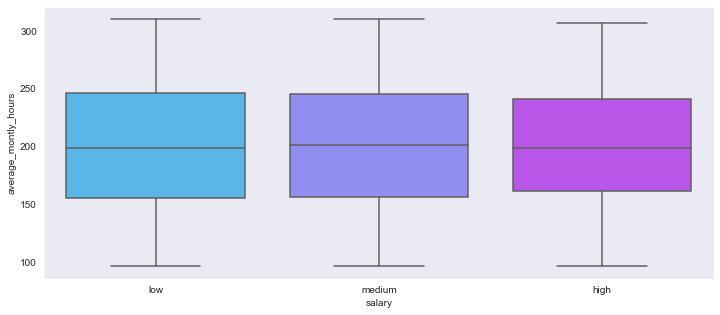

In [19]:
# Для начала проверим визуально
# Похоже на то, что все сотрудники независимо от оклада проводят на работе примерно одинаковое время
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='salary', y='average_montly_hours', palette='cool')

Теперь проверим гипотезы с помощью двухстороннего двухвыборочного критерия Стьюдента (нас интересует отклонения значений в любую сторону)

In [20]:
df_ls = df[['average_montly_hours']].loc[df.salary == 'low']
df_hs = df[['average_montly_hours']].loc[df.salary == 'high']

alpha = 0.05

result = stats.ttest_ind(df_ls['average_montly_hours'], df_hs['average_montly_hours'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Принимаем H1 - среднее время, проведенное сотрудниками с разным уровнем оклада на работе, отличается')
else:
    print('Не отвергаем H0 - среднее время, проведенное сотрудниками с разным уровнем оклада на работе, примерно одинаково')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем H0 - среднее время, проведенное сотрудниками с разным уровнем оклада на работе, примерно одинаково


***Задание 8***

 ***Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):***
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов    

In [24]:
# Делим сотрудников на работающих и уволившихся
work = df[df['left'] == 'No']
left = df[df['left'] == 'Yes']

***Было ли повышение за последние 5 лет?***

In [37]:
round(work['promotion_last_5years'].value_counts(normalize=True), 3)

No     0.974
Yes    0.026
Name: promotion_last_5years, dtype: float64

In [36]:
round(left['promotion_last_5years'].value_counts(normalize=True), 3)

No     0.995
Yes    0.005
Name: promotion_last_5years, dtype: float64

Среди работающих сотрудников повышение за последние 5 лет получили около 2,6%, среди уволившихся около 0,5% 

***Сколько составляет средняя степень удовлетворенности?***

In [33]:
round(work.satisfaction_level.mean(), 2)

0.67

In [32]:
round(left.satisfaction_level.mean(), 2)

0.44

Средняя степень удовлетворенности среди работающих сотрудников около 67%, среди уволившихся около 44%

***Каково среднее количество проектов?***

In [31]:
round(work.number_project.mean())

4

In [38]:
round(left.number_project.mean())

4

Среднее количество проектов среди работающих и уволившихся сотрудников одинаково - около 4

***Задание 9***
* Разделить данные на тестовую и обучающую выборки
* Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
* Оценить качество модели на тестовой выборке

In [21]:
# Выбираем данные и разделяем их на тестовую и обучающую выборки
lda_data = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
lda_target = df['left']

X_train, X_test, y_train, y_test = train_test_split(lda_data, lda_target, test_size=0.3, random_state=42)

In [22]:
# Построим модель 
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [68]:
# Оценим качество
result = pd.DataFrame([y_test.values, y_pred]).T
result.columns = ['test_values', 'predicted_values']
result

,test_values,predicted_values
0,No,No
1,No,No
2,No,No
3,Yes,No
4,No,No
...,...,...
4495,No,No
4496,No,Yes
4497,No,No
4498,No,No


In [69]:
print(f'Коэффициент точности модели: {accuracy_score(y_test, y_pred):.2f}')

Коэффициент точности модели: 0.75
